In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
from publicdata import  parse_app_url

url = parse_app_url('census://2015/5/CA/140/B17001')
tracts = url.geoframe()

In [4]:
parse_app_url('census://2015/5/CA/140/B17001').geo_url.shape_url

<FtpUrl shape+ftp://ftp2.census.gov/geo/tiger/TIGER2015/TRACT/tl_2015_06_tract.zip>

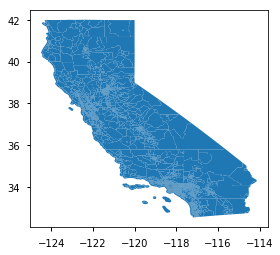

In [5]:
tracts.plot()

In [6]:
# The puma files moved, so the publicdata package is wrong. 
url = parse_app_url('shape+ftp://ftp2.census.gov/geo/tiger/TIGER2018/PUMA/tl_2018_06_puma10.zip')
pumas = url.get_resource().geoframe()

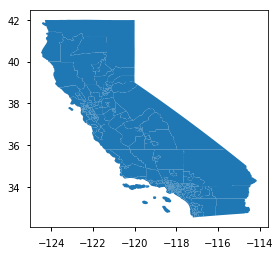

In [7]:
pumas.plot()

In [8]:
counties_pkg = mp.open_package('http://library.metatab.org/census.gov-counties-2017-2.csv')
counties = counties_pkg.resource('counties').geoframe()
sd = counties[counties.name == 'San Diego']

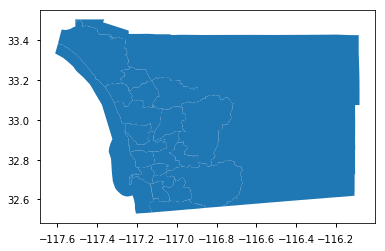

In [9]:
# The direct route crashes: Assertion failed: (0), function query, file AbstractSTRtree.cpp, line 287.
sd_pumas = pumas[pumas.GEOID10.str.startswith('06073')]
sd_pumas.plot()

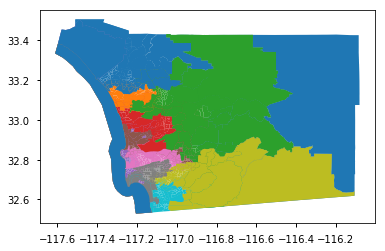

In [10]:
sd_pumas_tracts = gpd.sjoin(tracts, sd_pumas)
sd_pumas_tracts = sd_pumas_tracts[sd_pumas_tracts.countyfp == '073'].copy()
sd_pumas_tracts.plot(column='PUMACE10')

In [11]:
#sd_pumas_tracts.to_file('tracts.geojson','GeoJSON')
#sd_pumas.to_file('pumas.geojson','GeoJSON')

In [12]:
t = sd_pumas_tracts[['geoid', 'GEOID10']]
from geoid.census import CensusGeoid, State_puma5, Tract
t = pd.DataFrame({
    'puma_geoid': sd_pumas_tracts.GEOID10.apply(lambda v: State_puma5.parse(v).as_acs()),
    'tract_geoid': sd_pumas_tracts.geoid.apply(lambda v: Tract.parse(v).as_acs())
    } 
)

t = t.reset_index(drop=True)
t.to_csv('sandiego_puma_tract.csv')

In [13]:
url = parse_app_url('census://2016/5/CA/795/B03002')
pums_pop = url.dataframe()
pums_pop.titles.head().T

GEOID,79500US0600101,79500US0600102,79500US0600103,79500US0600104,79500US0600105
STUSAB,CA,CA,CA,CA,CA
COUNTY,,,,,
NAME,Alameda County (North)--Berkeley & Albany Citi...,Alameda County (Northwest)--Oakland (Northwest...,Alameda County (Northeast)--Oakland (East) & P...,Alameda County (North Central)--Oakland City (...,"Alameda County (West)--San Leandro, Alameda & ..."
B03002_001 HISPANIC OR LATINO ORIGIN BY RACE for Total Population - Total:,137963,166408,130663,133480,171116
B03002_001_m90,157,1728,1622,1880,644
B03002_002 HISPANIC OR LATINO ORIGIN BY RACE for Total Population - Not Hispanic or Latino:,122233,134237,117735,68817,135345
B03002_002_m90,1070,2025,1489,1897,1449
B03002_003 HISPANIC OR LATINO ORIGIN BY RACE for Total Population - Not Hispanic or Latino: - White alone,75152,45646,69479,9814,54854
B03002_003_m90,1434,1299,1173,764,1441
B03002_004 HISPANIC OR LATINO ORIGIN BY RACE for Total Population - Not Hispanic or Latino: - Black or African American alone,10459,39562,20848,39514,17454


In [14]:
!pwd

/Users/eric/proj/virt-proj/data-project/sdrdl-data-projects/census.gov/census.gov-pums-20165/notebooks
